<a href="https://colab.research.google.com/github/bhadreshpsavani/ExploringDataScience/blob/master/Analyse_Ecommerece_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import

In [94]:
import numpy as np
import pandas as pd

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [95]:
!git clone https://github.com/bhadreshpsavani/ExploringDataScience.git

fatal: destination path 'ExploringDataScience' already exists and is not an empty directory.


In [121]:
df = pd.read_csv('/content/ExploringDataScience/Dataset/e_commerce_data.csv', encoding = 'ISO-8859-1')

## 2. Analyse Features

In [122]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [123]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [125]:
(df.cust_id.isnull()*1 + df.description.isnull()*1).value_counts()

0    406829
1    133626
2      1454
dtype: int64

## Observations:
* `description` and `cust_id` column has missing value or null values in `13580` records
* `cust_id` can be converted to `Int64` since it will require less space
* `invoice_date` column is having object data type, since its date we should convert it to datatime format for easy handling of values

In [126]:
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can see that, `quantity` and `unit_price` column has negative values, **which seems incorrect.**

### Lets check how many values are incorrect:

In [127]:
df.query('quantity<0 or unit_price<0')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


We have around `10626` records with incorrect value

In [128]:
df['stock_code'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84559D       1
21610        1
35015        1
79341        1
84620        1
Name: stock_code, Length: 4070, dtype: int64

In [129]:
df['invoice_num'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
541702       1
554148       1
565545       1
537664       1
573255       1
Name: invoice_num, Length: 25900, dtype: int64

In [130]:
df['description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
OCEAN SCENT CANDLE JEWELLED DRAWER       1
Dotcom set                               1
sold as set/6 by dotcom                  1
mix up with c                            1
WRAP  PINK FLOCK                         1
Name: description, Length: 4223, dtype: int64

In [131]:
df['description'] = df['description'].str.lower()
df['description'].value_counts()

white hanging heart t-light holder     2369
regency cakestand 3 tier               2200
jumbo bag red retrospot                2159
party bunting                          1727
lunch bag red retrospot                1638
                                       ... 
zinc star t-light holder                  1
4 gold flock christmas balls              1
filigree diamante chain                   1
did  a credit  and did not tick ret       1
pink allium  artificial flower            1
Name: description, Length: 4206, dtype: int64

In [132]:
df['country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [133]:
df[df.duplicated()]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
517,536409,21866,union jack flag luggage tag,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,box of 6 mini vintage crackers,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,revolver wooden ruler,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,wicker star,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [136]:
df.query('invoice_num=="536409" and stock_code=="21866"')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
494,536409,21866,union jack flag luggage tag,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,union jack flag luggage tag,1,12/1/2010 11:45,1.25,17908.0,United Kingdom


In [137]:
df.query('invoice_num=="536409" and stock_code=="22866"')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
489,536409,22866,hand warmer scotty dog design,1,12/1/2010 11:45,2.1,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,12/1/2010 11:45,2.1,17908.0,United Kingdom


### Conclusion:
During preprocessing we need to handle this values
* Our data has missing value, incorrect values.
* We can change data type of `cust_id` and `invoice_date` 
* Duplicate records also need to be handle

## Step2. Data Preprocessing:
### i. Handle Missing Value: 
We generally replace missing value or incorrect value with `mean` or `median` of perticular column. There are chances to add  unnecessary bias in data.

We can also replace it with Representative value such as `-1`.

we will just drop it since we have huge data with us.

In [182]:
#replacing it with reprentative value
# df.loc[df.cust_id.isnull(), 'cust_id'] = -1
# df.loc[df.description.isnull(), 'description'] = -1
# df.info()

print(len(df.dropna())/len(df))

0.7483662262108188


In [183]:
df = df.dropna()

### ii. Handle Incorrect Value:
We will drop incorrect value

In [184]:
print(len(df.query('quantity > 0 and unit_price >= 0'))/ len(df))

0.9779085865678628


In [185]:
# df.loc[df.quantity < 0, 'quantity'] = -2
# df.loc[df.unit_price < 0, 'unit_price'] = -2
# df.describe()

df = df.query('quantity > 0 and unit_price >= 0')

### iii. Drop Duplicates:

In [186]:
df = df.drop_duplicates()

### iv. Handle Incorrect Datatype:

In [187]:
df.cust_id = df.cust_id.astype('int64')

In [188]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_num          392732 non-null  object        
 1   stock_code           392732 non-null  object        
 2   description          392732 non-null  object        
 3   quantity             392732 non-null  int64         
 4   invoice_date         392732 non-null  datetime64[ns]
 5   unit_price           392732 non-null  float64       
 6   cust_id              392732 non-null  int64         
 7   country              392732 non-null  object        
 8   total_amount         392732 non-null  float64       
 9   invoice_day          392732 non-null  int64         
 10  invoice_day_of_week  392732 non-null  int64         
 11  invoice_month        392732 non-null  int64         
 12  invoice_hour         392732 non-null  int64         
dtypes: datetime64[ns](1

### v. Add Columns related to Date

In [166]:
df['invoice_day'] = df['invoice_date'].dt.day
df['invoice_day_of_week'] = df['invoice_date'].dt.dayofweek
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_hour'] = df['invoice_date'].dt.hour
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,total_amount,invoice_day,invoice_day_of_week,invoice_month,invoice_hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,2,12,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,2,12,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8


In [167]:
# idx = pd.date_range(start='2010-12-01', freq='D', periods=3)
# print(idx.day_name())

### vi. Calculate Total Amount:

In [168]:
df['total_amount'] = df['quantity'] * df['unit_price']

In [171]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,total_amount,invoice_day,invoice_day_of_week,invoice_month,invoice_hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,2,12,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,2,12,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2,12,8


## Step3. Data Analysis:

### 1. Distributions of orders in each country?

In [201]:
df.pivot_table(index='country', values='invoice_num', aggfunc='count').sort_values(by='invoice_num', ascending=False)

,invoice_num
country,
United Kingdom,349227
Germany,9027
France,8327
EIRE,7228
Spain,2480
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1453


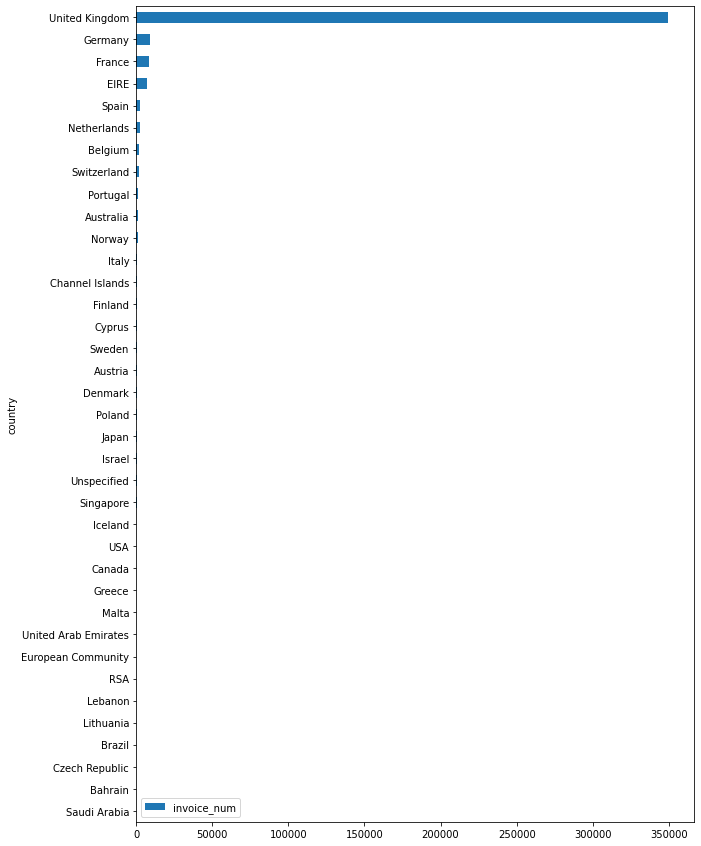

In [202]:
df.pivot_table(index='country', values='invoice_num', aggfunc='count').sort_values(by='invoice_num').plot.barh(figsize=(10, 15))

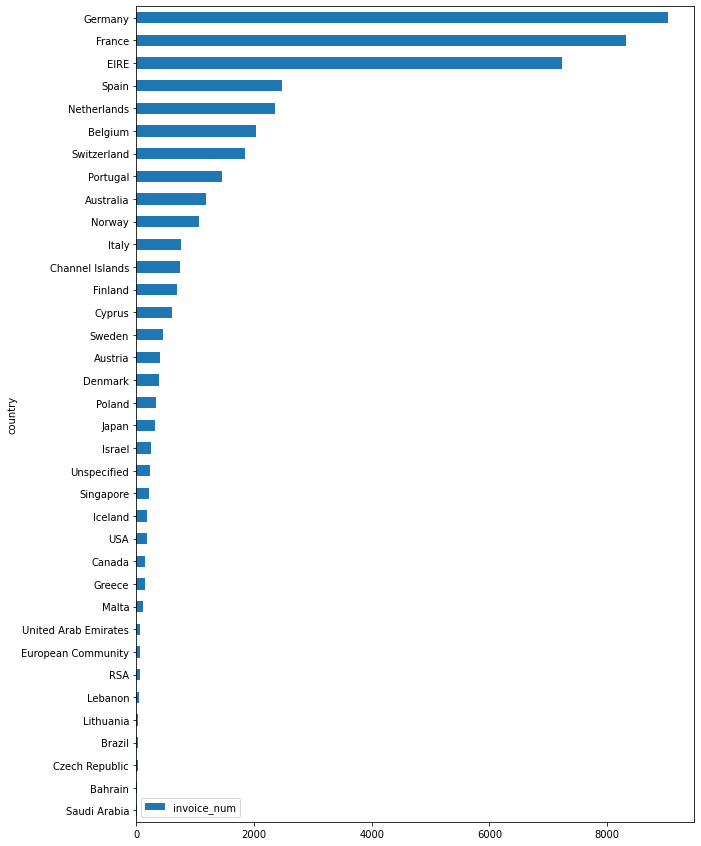

In [203]:
df.pivot_table(index='country', values='invoice_num', aggfunc='count').query('country!="United Kingdom"').sort_values(by='invoice_num').plot.barh(figsize=(10, 15))

### 2. In Which month We got maximum orders?

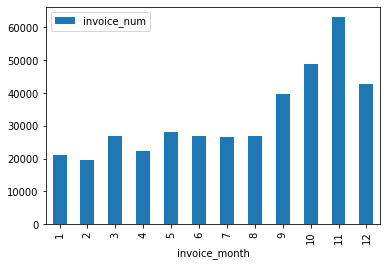

In [195]:
df.pivot_table(index='invoice_month', values='invoice_num', aggfunc='count').plot.bar()

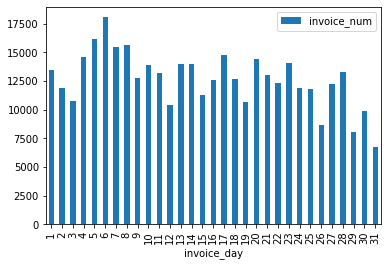

In [196]:
df.pivot_table(index='invoice_day', values='invoice_num', aggfunc='count').plot.bar()

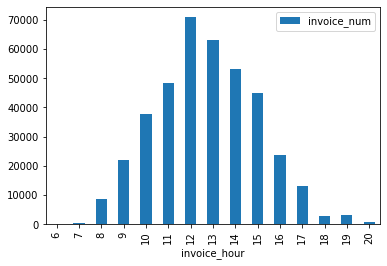

In [197]:
df.pivot_table(index='invoice_hour', values='invoice_num', aggfunc='count').plot.bar()

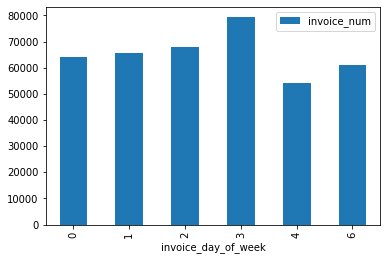

In [198]:
df.pivot_table(index='invoice_day_of_week', values='invoice_num', aggfunc='count').plot.bar()

### 3. What is Month wise average profit per order?

In [199]:
df.pivot_table(index='invoice_month', values='total_amount', aggfunc=['mean', 'sum'])

,mean,sum
,total_amount,total_amount
invoice_month,,
1,27.064042,568101.310
2,22.635861,446084.920
3,22.107836,594081.760
4,20.876948,468374.331
5,24.126630,677355.150
6,24.513335,660046.050
7,22.532650,598962.901
8,24.035343,644051.040


### 4. Month wise Free orders?

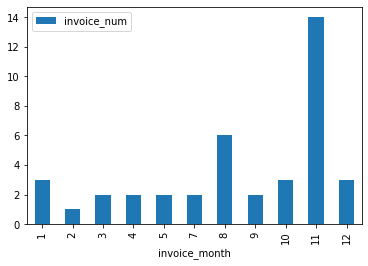

In [200]:
df.query('total_amount==0').pivot_table(index='invoice_month', values='invoice_num', aggfunc='count').plot.bar()